In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum()) #funnily enough, duplicates is 0 but X9 and X16 is the same as seen from the summary. 
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [3]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values

    return summ

summary(df)

data shape: (78682, 21)


,data type,#missing,min,max
company_name,object,0,NaN,NaN
status_label,object,0,NaN,NaN
year,int64,0,1999.0,2018.0
X1,float64,0,-7.76,169662.0
X2,float64,0,-366.645,374623.0
X3,float64,0,0.0,28430.0
X4,float64,0,-21913.0,81730.0
X5,float64,0,0.0,62567.0
X6,float64,0,-98696.0,104821.0
X7,float64,0,-0.006,65812.0


No missing values in the data. Minimum and maximum data also makes sense. 
X9 and X16 is the same, should remove one or multi-collinearity will occur. Will remove X16.

In [4]:
df = df.drop('X16', axis=1)

In [5]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print(df['status_label'].value_counts())
print("Alive Ratio:", alive_ratio) #93%
print("Failed Ratio:", failed_ratio) #6%

status_label
alive     73462
failed     5220
Name: count, dtype: int64
Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


<Figure size 1200x800 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X1'),
  Text(1, 0, 'X2'),
  Text(2, 0, 'X3'),
  Text(3, 0, 'X4'),
  Text(4, 0, 'X5'),
  Text(5, 0, 'X6'),
  Text(6, 0, 'X7'),
  Text(7, 0, 'X8'),
  Text(8, 0, 'X9'),
  Text(9, 0, 'X10'),
  Text(10, 0, 'X11'),
  Text(11, 0, 'X12'),
  Text(12, 0, 'X13'),
  Text(13, 0, 'X14'),
  Text(14, 0, 'X15'),
  Text(15, 0, 'X17'),
  Text(16, 0, 'X18')])

Text(0.5, 1.0, 'Box Plot of Numerical Features with Outliers')

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Values')

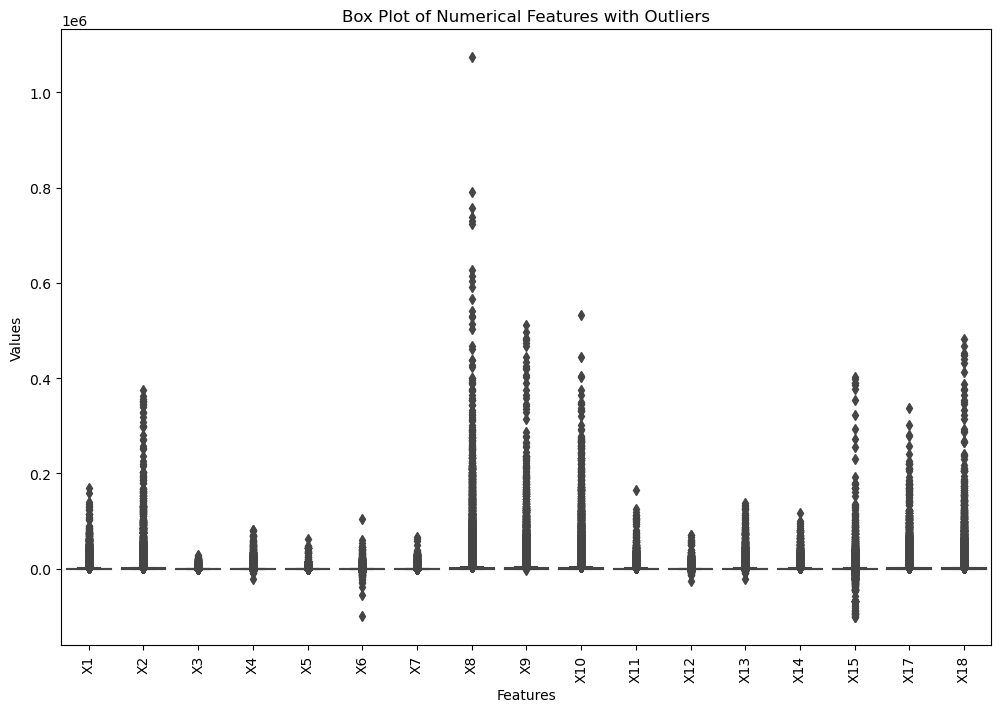

In [6]:
Q1 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']].quantile(0.25)
Q3 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']] < (Q1 - 1.5 * IQR)) | (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']] > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

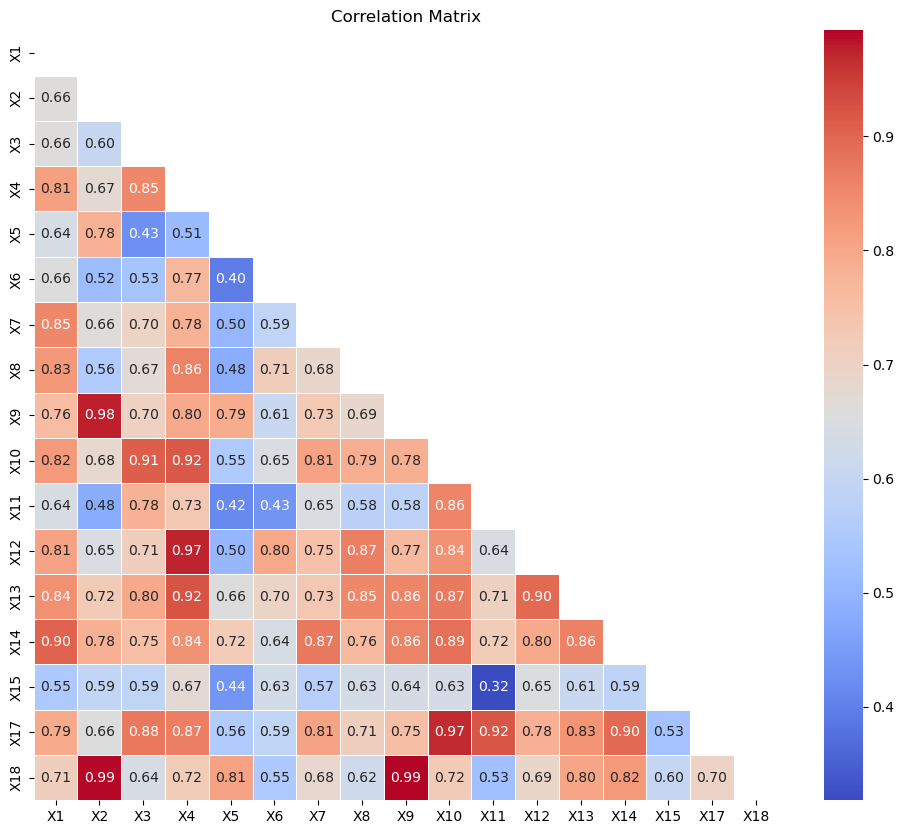

In [7]:
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

X15 - low correlation effect with all other variables
potential multi-collinearity etween X2, X18, X9

17

<Axes: >

Text(0.5, 1.0, 'X1')

[]

<Axes: >

Text(0.5, 1.0, 'X2')

[]

<Axes: >

Text(0.5, 1.0, 'X3')

[]

<Axes: >

Text(0.5, 1.0, 'X4')

[]

<Axes: >

Text(0.5, 1.0, 'X5')

[]

<Axes: >

Text(0.5, 1.0, 'X6')

[]

<Axes: >

Text(0.5, 1.0, 'X7')

[]

<Axes: >

Text(0.5, 1.0, 'X8')

[]

<Axes: >

Text(0.5, 1.0, 'X9')

[]

<Axes: >

Text(0.5, 1.0, 'X10')

[]

<Axes: >

Text(0.5, 1.0, 'X11')

[]

<Axes: >

Text(0.5, 1.0, 'X12')

[]

<Axes: >

Text(0.5, 1.0, 'X13')

[]

<Axes: >

Text(0.5, 1.0, 'X14')

[]

<Axes: >

Text(0.5, 1.0, 'X15')

[]

<Axes: >

Text(0.5, 1.0, 'X17')

[]

<Axes: >

Text(0.5, 1.0, 'X18')

[]

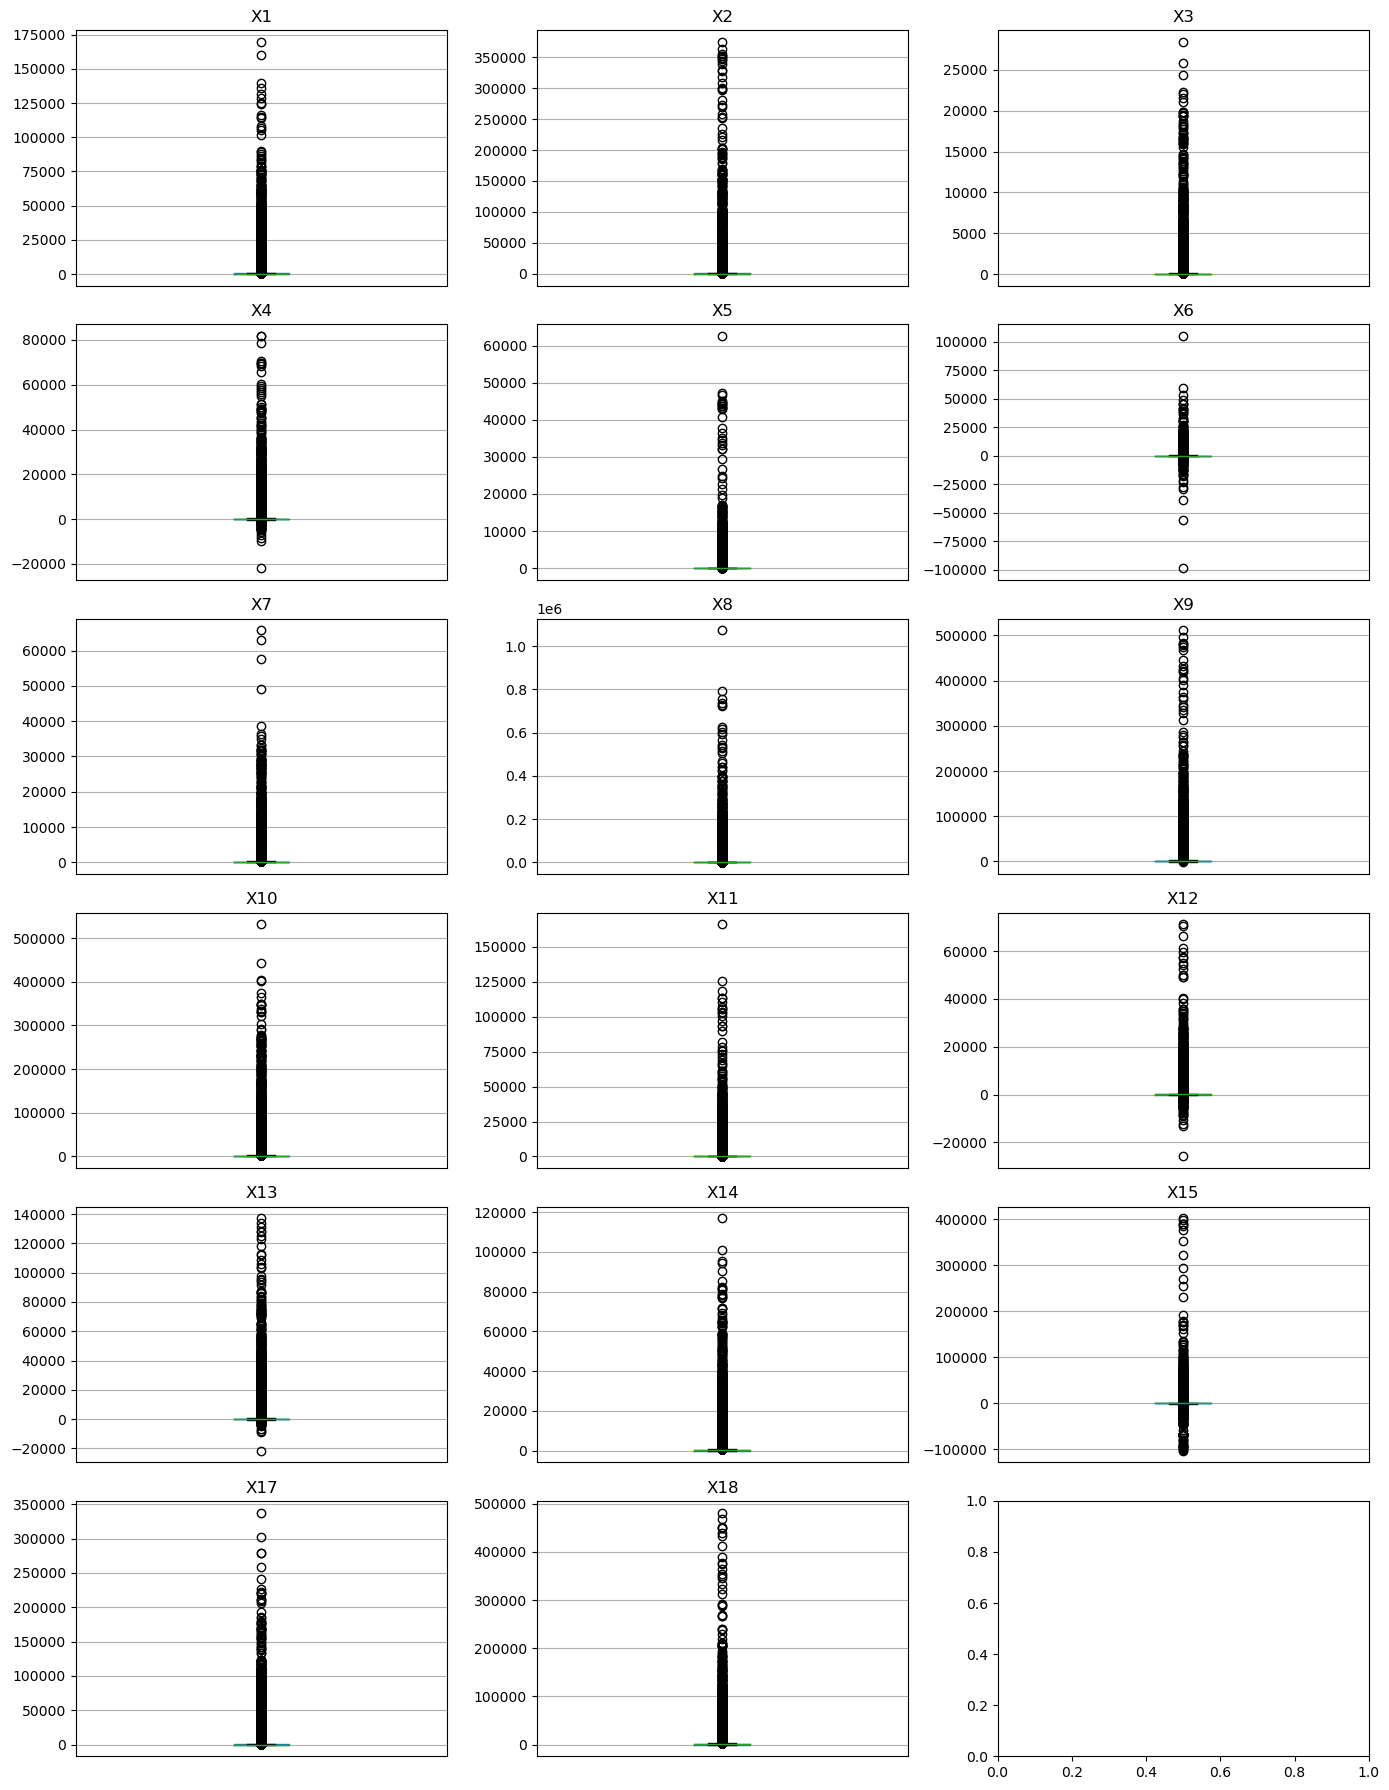

In [8]:
columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X17','X18']

df_out = df[columns]

len(columns)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(14, 18))

for i, col in enumerate(columns):
    fila = i // 3
    columna = i % 3
    df_out.boxplot(column=col, ax=axes[fila, columna])
    axes[fila, columna].set_title(col)
    axes[fila, columna].set_xticks([])

plt.tight_layout()
plt.show()

Overall, although there are a lot of outliers in the financial data, we are keeping it in. Why?


1. Outliers Represent Extreme Financial Distress
In bankruptcy prediction, outliers often represent companies in severe financial trouble. These extreme cases provide valuable signals that differentiate failing firms from healthy ones. Removing them may lead to a model that underestimates the risk of bankruptcy.

2. Real-World Financial Anomalies Matter
In finance, extreme values (such as sudden cash flow drops, skyrocketing debt ratios, or revenue crashes) often indicate early warning signs of distress. These events should be included in the model to improve predictive accuracy.

3. Bankruptcy is Rare but Critical
Bankruptcy is an uncommon event, meaning that removing outliers might remove some of the most important training examples. Keeping them helps ensure the model learns patterns from real bankruptcies.

# Balancing Dataset

In [9]:
from sklearn.utils import resample

df_majority = df[df.status_label == "alive"]
df_minority = df[df.status_label == "failed"]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.head()
df_balanced.info()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X17,X18
27968,C_2509,alive,2000,3.027,0.303,0.232,-2.638,0.654,-2.772,0.087,6.2065,1.190,3.989,0.000,-2.870,0.887,0.360,-33.301,0.360,3.828
14232,C_1178,alive,2016,1546.200,4414.200,509.500,813.200,630.400,-3.900,700.500,4235.8940,5550.600,8762.600,3537.100,303.700,1136.400,922.600,-136.200,6489.600,4737.400
12784,C_1061,alive,2015,240.664,59.744,22.900,28.028,26.388,-6.079,18.398,706.4476,196.129,406.505,147.329,5.128,136.385,30.830,9.522,187.829,168.101
43181,C_4501,alive,2016,12.079,47.827,2.548,4.634,0.248,4.196,2.869,43.4663,52.461,49.625,0.000,2.086,4.634,8.717,17.727,13.074,47.827
64530,C_6952,alive,2002,71.568,14.918,3.697,-25.435,6.511,-27.623,1.510,74.1139,13.469,110.773,0.000,-29.132,-1.449,4.113,-107.730,4.113,38.904


<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 27968 to 78624
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  10440 non-null  object 
 1   status_label  10440 non-null  object 
 2   year          10440 non-null  int64  
 3   X1            10440 non-null  float64
 4   X2            10440 non-null  float64
 5   X3            10440 non-null  float64
 6   X4            10440 non-null  float64
 7   X5            10440 non-null  float64
 8   X6            10440 non-null  float64
 9   X7            10440 non-null  float64
 10  X8            10440 non-null  float64
 11  X9            10440 non-null  float64
 12  X10           10440 non-null  float64
 13  X11           10440 non-null  float64
 14  X12           10440 non-null  float64
 15  X13           10440 non-null  float64
 16  X14           10440 non-null  float64
 17  X15           10440 non-null  float64
 18  X17           10440 non-nul

In [10]:
X = df_balanced.drop(columns=["status_label", "company_name", "year"])  # Features (all columns except status_label)
y = df_balanced["status_label"]  # Target column

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8352, 17)
X_test shape: (2088, 17)
y_train shape: (8352,)
y_test shape: (2088,)


RandomForestClassifier(random_state=99)

Accuracy on train set: 1.0
Accuracy on test set: 0.7466475095785441

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.76      0.72      0.74      1052
      failed       0.73      0.77      0.75      1036

    accuracy                           0.75      2088
   macro avg       0.75      0.75      0.75      2088
weighted avg       0.75      0.75      0.75      2088



<Axes: >

<Axes: >

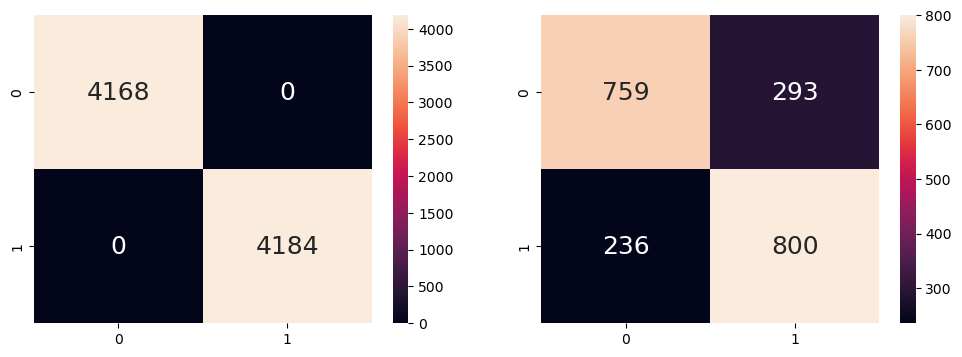

In [11]:
rf = RandomForestClassifier(random_state=99)
rf.fit(X_train, y_train)

# Predict labels for train set
y_train_pred = rf.predict(X_train)

# Predict labels for test set
y_test_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Balanced with Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier(random_state=99)
gr_space = {
    'max_depth': [7,10],
    'n_estimators': [100, 400, 500],
    'max_features': [10, 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.682 total time=   1.7s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.678 total time=   1.7s
[CV 3/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.673 total time=   1.7s
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.683 total time=   6.8s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.686 total time=   6.8s
[CV 3/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.671 total time=   7.1s
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=500;, score=0.684 total time=   8.5s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=500;, score=0.685 total time=   8.6s
[CV 3/3] END max_depth=7, max_feat

[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.710 total time=   2.2s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.697 total time=   2.2s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.685 total time=   2.2s
[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=400;, score=0.711 total time=   8.6s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=400;, score=0.699 total time=   8.6s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=400;, score=0.686 total time=   8.5s
[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=500;, score=0.712 total time=  10.7s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=500;, score=0.698 total time=  10.7s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=500;, score

RandomForestClassifier(max_depth=10, max_features=10, random_state=99)

Test Accuracy with Best Params: 0.7055


<Figure size 600x500 with 0 Axes>

<Axes: >

Text(0.5, 25.722222222222214, 'Predicted Label')

Text(45.722222222222214, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix for Test Set')

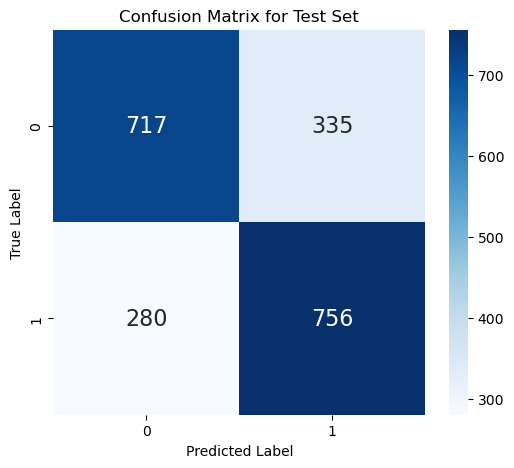

<Figure size 1000x500 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X6'),
  Text(1, 0, 'X8'),
  Text(2, 0, 'X11'),
  Text(3, 0, 'X15'),
  Text(4, 0, 'X3'),
  Text(5, 0, 'X1'),
  Text(6, 0, 'X7'),
  Text(7, 0, 'X17'),
  Text(8, 0, 'X13'),
  Text(9, 0, 'X2'),
  Text(10, 0, 'X5'),
  Text(11, 0, 'X14'),
  Text(12, 0, 'X18'),
  Text(13, 0, 'X10'),
  Text(14, 0, 'X12'),
  Text(15, 0, 'X9'),
  Text(16, 0, 'X4')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

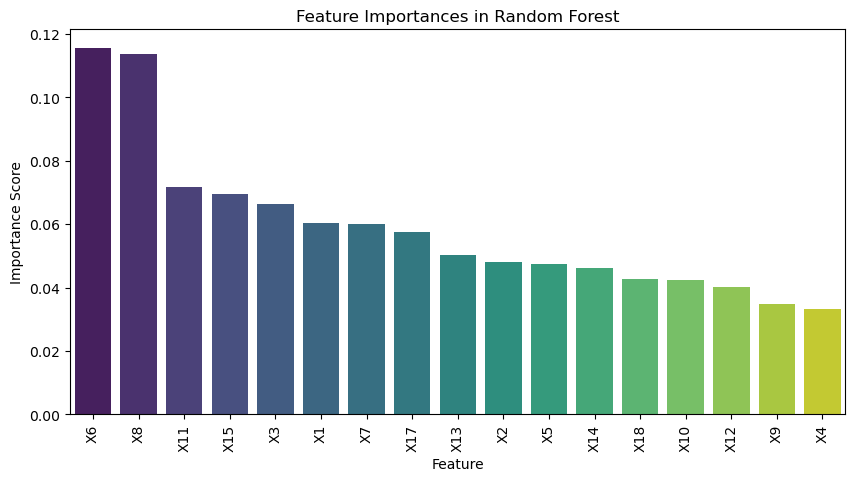

In [13]:
best_params = model_grid.best_params_
rf_best = RandomForestClassifier(**best_params, random_state=99)
rf_best.fit(X_train, y_train)

# Evaluate the Model
y_test_pred = rf_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy with Best Params: {test_accuracy:.4f}')

# Plot the Confusion Matrix for Test Data
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Plot Feature Importances
feature_importances = rf_best.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

# No balancing

In [14]:
X = df.drop(columns=["status_label", "company_name", "year"])  # Features (all columns except status_label)
y = df["status_label"]  # Target column

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62945, 17)
X_test shape: (15737, 17)
y_train shape: (62945,)
y_test shape: (15737,)


RandomForestClassifier(random_state=99)

Accuracy on train set: 1.0
Accuracy on test set: 0.937154476710936

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.94      1.00      0.97     14678
      failed       0.99      0.07      0.13      1059

    accuracy                           0.94     15737
   macro avg       0.96      0.53      0.55     15737
weighted avg       0.94      0.94      0.91     15737



<Axes: >

<Axes: >

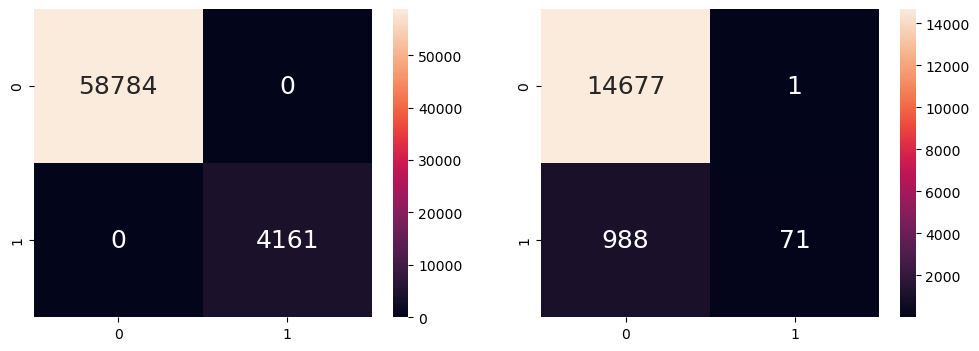

In [15]:
rf = RandomForestClassifier(random_state=99)
rf.fit(X_train, y_train)

# Predict labels for train set
y_train_pred = rf.predict(X_train)

# Predict labels for test set
y_test_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Training, Classification and Validation Balanced

In [24]:
df_train = df[df["year"] <= 2011]
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label", "year"])

df_train = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
df_majority = df_train[df_train.status_label == "alive"]
df_minority = df_train[df_train.status_label == "failed"]

# Downsample majority class to match the minority class size
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

# Combine downsampled majority class with minority class
df_train_balanced = pd.concat([df_majority_downsampled, df_minority])

# Extract X and y after balancing
X_train_balanced = df_train_balanced.drop(columns=["status_label"])
y_train_balanced = df_train_balanced["status_label"]

X_train_balanced.info()
y_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8884 entries, 68464 to 78623
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      8884 non-null   float64
 1   X2      8884 non-null   float64
 2   X3      8884 non-null   float64
 3   X4      8884 non-null   float64
 4   X5      8884 non-null   float64
 5   X6      8884 non-null   float64
 6   X7      8884 non-null   float64
 7   X8      8884 non-null   float64
 8   X9      8884 non-null   float64
 9   X10     8884 non-null   float64
 10  X11     8884 non-null   float64
 11  X12     8884 non-null   float64
 12  X13     8884 non-null   float64
 13  X14     8884 non-null   float64
 14  X15     8884 non-null   float64
 15  X17     8884 non-null   float64
 16  X18     8884 non-null   float64
dtypes: float64(17)
memory usage: 1.2 MB
<class 'pandas.core.series.Series'>
Index: 8884 entries, 68464 to 78623
Series name: status_label
Non-Null Count  Dtype 
--------------  ----- 
8884 

In [25]:
df_val = df[(df["year"] <= 2014) & (df["year"] >= 2012)]
y_val = df_val["status_label"]
X_val = df_val.drop(columns = ["company_name", "status_label", "year"])
X_val.info()
y_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10473 entries, 13 to 78677
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10473 non-null  float64
 1   X2      10473 non-null  float64
 2   X3      10473 non-null  float64
 3   X4      10473 non-null  float64
 4   X5      10473 non-null  float64
 5   X6      10473 non-null  float64
 6   X7      10473 non-null  float64
 7   X8      10473 non-null  float64
 8   X9      10473 non-null  float64
 9   X10     10473 non-null  float64
 10  X11     10473 non-null  float64
 11  X12     10473 non-null  float64
 12  X13     10473 non-null  float64
 13  X14     10473 non-null  float64
 14  X15     10473 non-null  float64
 15  X17     10473 non-null  float64
 16  X18     10473 non-null  float64
dtypes: float64(17)
memory usage: 1.4 MB
<class 'pandas.core.series.Series'>
Index: 10473 entries, 13 to 78677
Series name: status_label
Non-Null Count  Dtype 
--------------  ----- 
10473 non

In [26]:
df_test = df[(df["year"] >= 2015)]
y_test = df_test["status_label"]
X_test = df_test.drop(columns = ["company_name", "status_label", "year"])
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12282 entries, 16 to 78681
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      12282 non-null  float64
 1   X2      12282 non-null  float64
 2   X3      12282 non-null  float64
 3   X4      12282 non-null  float64
 4   X5      12282 non-null  float64
 5   X6      12282 non-null  float64
 6   X7      12282 non-null  float64
 7   X8      12282 non-null  float64
 8   X9      12282 non-null  float64
 9   X10     12282 non-null  float64
 10  X11     12282 non-null  float64
 11  X12     12282 non-null  float64
 12  X13     12282 non-null  float64
 13  X14     12282 non-null  float64
 14  X15     12282 non-null  float64
 15  X17     12282 non-null  float64
 16  X18     12282 non-null  float64
dtypes: float64(17)
memory usage: 1.7 MB
<class 'pandas.core.series.Series'>
Index: 12282 entries, 16 to 78681
Series name: status_label
Non-Null Count  Dtype 
--------------  ----- 
12282 non

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf_grid = RandomForestClassifier(random_state=99)
gr_space = {
    'max_depth': [7,10],
    'n_estimators': [100, 400, 500],
    'max_features': [10, 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train_balanced, y_train_balanced)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.565 total time=   2.0s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.615 total time=   1.8s
[CV 3/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.607 total time=   1.9s
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.565 total time=   7.7s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.616 total time=   8.1s
[CV 3/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.605 total time=   7.1s
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=500;, score=0.564 total time=   9.0s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=500;, score=0.616 total time=   9.1s
[CV 3/3] END max_depth=7, max_feat

[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.578 total time=   2.3s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.621 total time=   2.3s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.605 total time=   2.3s
[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=400;, score=0.576 total time=   9.1s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=400;, score=0.619 total time=   8.9s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=400;, score=0.611 total time=   9.1s
[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=500;, score=0.577 total time=  40.6s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=500;, score=0.618 total time=  13.6s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=4, n_estimators=500;, score

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=2,
                       random_state=99)

Test Accuracy with Best Params: 0.6437


<Figure size 600x500 with 0 Axes>

<Axes: >

Text(0.5, 25.722222222222214, 'Predicted Label')

Text(45.722222222222214, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix for Test Set')

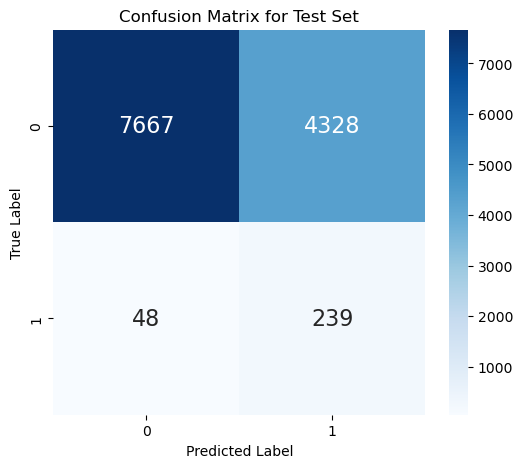

<Figure size 1000x500 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X6'),
  Text(1, 0, 'X8'),
  Text(2, 0, 'X11'),
  Text(3, 0, 'X15'),
  Text(4, 0, 'X7'),
  Text(5, 0, 'X5'),
  Text(6, 0, 'X3'),
  Text(7, 0, 'X1'),
  Text(8, 0, 'X17'),
  Text(9, 0, 'X2'),
  Text(10, 0, 'X13'),
  Text(11, 0, 'X14'),
  Text(12, 0, 'X18'),
  Text(13, 0, 'X12'),
  Text(14, 0, 'X10'),
  Text(15, 0, 'X9'),
  Text(16, 0, 'X4')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

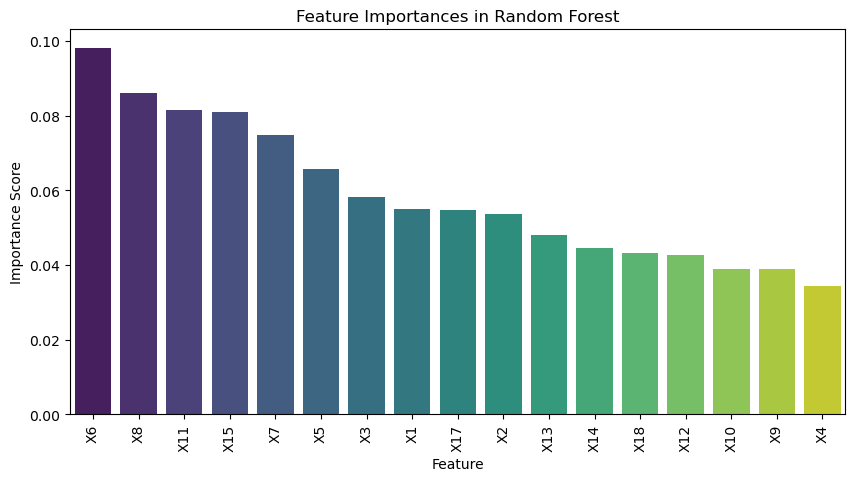

In [30]:
best_params = model_grid.best_params_
rf_best = RandomForestClassifier(**best_params, random_state=99)
rf_best.fit(X_train_balanced, y_train_balanced)

# Evaluate the Model
y_test_pred = rf_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy with Best Params: {test_accuracy:.4f}')

# Plot the Confusion Matrix for Test Data
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Plot Feature Importances
feature_importances = rf_best.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_balanced.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

# SMOTE

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Apply SMOTE only to training data
smote = SMOTE(random_state=99)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now fit the model with resampled data
rf_best.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=2,
                       random_state=99)

In [ ]:
rf_grid = RandomForestClassifier(random_state=99)
gr_space = {
    'max_depth': [7,10],
    'n_estimators': [100, 400],
    'max_features': [10, 40],
    'min_samples_leaf': [1, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train_resampled, y_train_resampled)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.713 total time=  32.7s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.730 total time=  32.1s
[CV 3/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.732 total time=  32.0s
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.712 total time= 2.1min
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.730 total time= 2.1min
[CV 3/3] END max_depth=7, max_features=10, min_samples_leaf=1, n_estimators=400;, score=0.733 total time= 2.1min
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.715 total time=  32.2s


In [ ]:
best_params = model_grid.best_params_
rf_best = RandomForestClassifier(**best_params, random_state=99)
rf_best.fit(X_train_resampled, y_train_resampled)

# Evaluate the Model
y_test_pred = rf_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy with Best Params: {test_accuracy:.4f}')

# Plot the Confusion Matrix for Test Data
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Plot Feature Importances
feature_importances = rf_best.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_resampled.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()